## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import statsModel
import scrapbook as sb 
import torch 
import statsModel
import baselineModels
import energyefficiencyDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error 

## Import Dataset 


In [3]:
n_features = 13
n_samples= 506
n_target = 1 
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 



                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.916
Model:                            OLS   Adj. R-squared (uncentered):              0.915
Method:                 Least Squares   F-statistic:                              944.1
Date:                Sun, 24 Jul 2022   Prob (F-statistic):                   1.99e-321
Time:                        15:57:23   Log-Likelihood:                         -110.40
No. Observations:                 614   AIC:                                      234.8
Df Residuals:                     607   BIC:                                      265.7
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


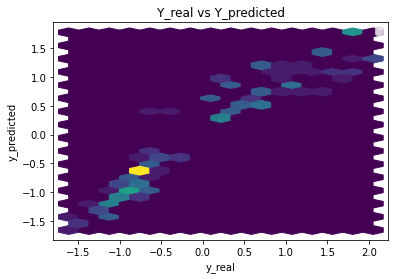

Performance Metrics
Mean Squared Error: 0.08375761323101924
Mean Absolute Error: 0.20075573747945522
Manhattan distance: 30.916383571836107
Euclidean distance: 3.5914721824868647


Stats Model MAE 0.20075573747945522


In [5]:
coefficients , y_pred =statsModel.statsModel(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Coefficients",coefficients)
mae = mean_absolute_error(y_pred, y_test)
print("Stats Model MAE", mae)

# Catboost Model 

In [6]:
mae_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Catboost MAE",mae_cb)
print("Catboost MAE",mae_cb)

Learning rate set to 0.037906
0:	learn: 0.9689496	total: 52.7ms	remaining: 52.6s
1:	learn: 0.9366685	total: 54ms	remaining: 27s
2:	learn: 0.9092958	total: 56.8ms	remaining: 18.9s
3:	learn: 0.8785128	total: 57.3ms	remaining: 14.3s
4:	learn: 0.8535550	total: 59.4ms	remaining: 11.8s
5:	learn: 0.8248775	total: 65.4ms	remaining: 10.8s
6:	learn: 0.8022422	total: 65.7ms	remaining: 9.32s
7:	learn: 0.7790783	total: 66.8ms	remaining: 8.28s
8:	learn: 0.7534935	total: 68.3ms	remaining: 7.52s
9:	learn: 0.7294735	total: 69.4ms	remaining: 6.87s
10:	learn: 0.7066430	total: 69.8ms	remaining: 6.27s
11:	learn: 0.6843788	total: 73ms	remaining: 6.01s
12:	learn: 0.6641521	total: 75.9ms	remaining: 5.76s
13:	learn: 0.6439410	total: 78.2ms	remaining: 5.51s
14:	learn: 0.6239340	total: 79.3ms	remaining: 5.21s
15:	learn: 0.6041992	total: 80.1ms	remaining: 4.92s
16:	learn: 0.5855219	total: 81.3ms	remaining: 4.7s
17:	learn: 0.5683488	total: 81.6ms	remaining: 4.45s
18:	learn: 0.5525649	total: 82.2ms	remaining: 4.24s

19:	learn: 0.5367440	total: 86ms	remaining: 4.21s
20:	learn: 0.5213055	total: 91.2ms	remaining: 4.25s
21:	learn: 0.5047377	total: 91.8ms	remaining: 4.08s
22:	learn: 0.4910947	total: 93.9ms	remaining: 3.99s
23:	learn: 0.4768104	total: 99.9ms	remaining: 4.06s
24:	learn: 0.4620226	total: 101ms	remaining: 3.95s
25:	learn: 0.4482606	total: 102ms	remaining: 3.82s
26:	learn: 0.4350881	total: 102ms	remaining: 3.69s
27:	learn: 0.4213019	total: 106ms	remaining: 3.69s
28:	learn: 0.4100160	total: 110ms	remaining: 3.68s
29:	learn: 0.3985551	total: 113ms	remaining: 3.66s
30:	learn: 0.3863781	total: 114ms	remaining: 3.55s
31:	learn: 0.3749652	total: 115ms	remaining: 3.48s
32:	learn: 0.3641790	total: 117ms	remaining: 3.42s
33:	learn: 0.3539049	total: 118ms	remaining: 3.35s
34:	learn: 0.3435832	total: 119ms	remaining: 3.28s
35:	learn: 0.3336435	total: 120ms	remaining: 3.22s
36:	learn: 0.3251115	total: 121ms	remaining: 3.15s
37:	learn: 0.3165436	total: 122ms	remaining: 3.08s
38:	learn: 0.3078636	total: 

59:	learn: 0.1814404	total: 148ms	remaining: 2.32s
60:	learn: 0.1777187	total: 150ms	remaining: 2.31s
61:	learn: 0.1735781	total: 152ms	remaining: 2.3s
62:	learn: 0.1695911	total: 154ms	remaining: 2.28s
63:	learn: 0.1664867	total: 155ms	remaining: 2.27s
64:	learn: 0.1641477	total: 156ms	remaining: 2.24s
65:	learn: 0.1611098	total: 156ms	remaining: 2.21s
66:	learn: 0.1584419	total: 156ms	remaining: 2.18s
67:	learn: 0.1544145	total: 157ms	remaining: 2.15s
68:	learn: 0.1505726	total: 160ms	remaining: 2.16s
69:	learn: 0.1470698	total: 161ms	remaining: 2.14s
70:	learn: 0.1435267	total: 162ms	remaining: 2.12s
71:	learn: 0.1406336	total: 163ms	remaining: 2.1s
72:	learn: 0.1373369	total: 164ms	remaining: 2.08s
73:	learn: 0.1349641	total: 164ms	remaining: 2.05s
74:	learn: 0.1325414	total: 164ms	remaining: 2.03s
75:	learn: 0.1297959	total: 165ms	remaining: 2s
76:	learn: 0.1269258	total: 165ms	remaining: 1.98s
77:	learn: 0.1248283	total: 170ms	remaining: 2.01s
78:	learn: 0.1224081	total: 172ms	re

109:	learn: 0.0746640	total: 216ms	remaining: 1.74s
110:	learn: 0.0737128	total: 216ms	remaining: 1.73s
111:	learn: 0.0726028	total: 216ms	remaining: 1.71s
112:	learn: 0.0717302	total: 217ms	remaining: 1.7s
113:	learn: 0.0711093	total: 217ms	remaining: 1.69s
114:	learn: 0.0699925	total: 217ms	remaining: 1.67s
115:	learn: 0.0690192	total: 220ms	remaining: 1.67s
116:	learn: 0.0682088	total: 220ms	remaining: 1.66s
117:	learn: 0.0672508	total: 221ms	remaining: 1.65s
118:	learn: 0.0662456	total: 233ms	remaining: 1.72s
119:	learn: 0.0654560	total: 233ms	remaining: 1.71s
120:	learn: 0.0652406	total: 233ms	remaining: 1.69s
121:	learn: 0.0643859	total: 239ms	remaining: 1.72s
122:	learn: 0.0638655	total: 240ms	remaining: 1.71s
123:	learn: 0.0631594	total: 244ms	remaining: 1.73s
124:	learn: 0.0624376	total: 245ms	remaining: 1.71s
125:	learn: 0.0617617	total: 245ms	remaining: 1.7s
126:	learn: 0.0612403	total: 247ms	remaining: 1.7s
127:	learn: 0.0605801	total: 248ms	remaining: 1.69s
128:	learn: 0.0

149:	learn: 0.0520097	total: 282ms	remaining: 1.59s
150:	learn: 0.0518058	total: 282ms	remaining: 1.59s
151:	learn: 0.0515870	total: 285ms	remaining: 1.59s
152:	learn: 0.0512368	total: 286ms	remaining: 1.58s
153:	learn: 0.0510199	total: 287ms	remaining: 1.58s
154:	learn: 0.0507762	total: 287ms	remaining: 1.57s
155:	learn: 0.0504735	total: 294ms	remaining: 1.59s
156:	learn: 0.0502680	total: 298ms	remaining: 1.6s
157:	learn: 0.0500836	total: 300ms	remaining: 1.6s
158:	learn: 0.0498779	total: 302ms	remaining: 1.59s
159:	learn: 0.0496353	total: 303ms	remaining: 1.59s
160:	learn: 0.0495039	total: 304ms	remaining: 1.58s
161:	learn: 0.0492555	total: 305ms	remaining: 1.58s
162:	learn: 0.0490324	total: 308ms	remaining: 1.58s
163:	learn: 0.0488584	total: 308ms	remaining: 1.57s
164:	learn: 0.0486234	total: 309ms	remaining: 1.56s
165:	learn: 0.0484601	total: 309ms	remaining: 1.55s
166:	learn: 0.0482416	total: 310ms	remaining: 1.55s
167:	learn: 0.0480801	total: 311ms	remaining: 1.54s
168:	learn: 0.

196:	learn: 0.0432170	total: 354ms	remaining: 1.44s
197:	learn: 0.0430657	total: 355ms	remaining: 1.44s
198:	learn: 0.0429555	total: 356ms	remaining: 1.43s
199:	learn: 0.0428523	total: 356ms	remaining: 1.43s
200:	learn: 0.0427194	total: 357ms	remaining: 1.42s
201:	learn: 0.0425497	total: 358ms	remaining: 1.41s
202:	learn: 0.0424170	total: 358ms	remaining: 1.41s
203:	learn: 0.0423198	total: 359ms	remaining: 1.4s
204:	learn: 0.0421959	total: 360ms	remaining: 1.39s
205:	learn: 0.0419818	total: 360ms	remaining: 1.39s
206:	learn: 0.0418469	total: 361ms	remaining: 1.38s
207:	learn: 0.0416998	total: 362ms	remaining: 1.38s
208:	learn: 0.0416162	total: 362ms	remaining: 1.37s
209:	learn: 0.0413670	total: 363ms	remaining: 1.36s
210:	learn: 0.0412414	total: 364ms	remaining: 1.36s
211:	learn: 0.0409990	total: 364ms	remaining: 1.35s
212:	learn: 0.0408690	total: 365ms	remaining: 1.35s
213:	learn: 0.0406257	total: 365ms	remaining: 1.34s
214:	learn: 0.0405418	total: 366ms	remaining: 1.33s
215:	learn: 0

288:	learn: 0.0329484	total: 412ms	remaining: 1.01s
289:	learn: 0.0328753	total: 414ms	remaining: 1.01s
290:	learn: 0.0327982	total: 415ms	remaining: 1.01s
291:	learn: 0.0326735	total: 415ms	remaining: 1.01s
292:	learn: 0.0325290	total: 416ms	remaining: 1s
293:	learn: 0.0324478	total: 416ms	remaining: 999ms
294:	learn: 0.0324058	total: 417ms	remaining: 997ms
295:	learn: 0.0323288	total: 418ms	remaining: 994ms
296:	learn: 0.0321962	total: 418ms	remaining: 990ms
297:	learn: 0.0321383	total: 419ms	remaining: 987ms
298:	learn: 0.0320658	total: 419ms	remaining: 983ms
299:	learn: 0.0320031	total: 420ms	remaining: 979ms
300:	learn: 0.0319491	total: 423ms	remaining: 982ms
301:	learn: 0.0318789	total: 423ms	remaining: 978ms
302:	learn: 0.0318462	total: 427ms	remaining: 983ms
303:	learn: 0.0317486	total: 428ms	remaining: 980ms
304:	learn: 0.0316972	total: 429ms	remaining: 978ms
305:	learn: 0.0315743	total: 430ms	remaining: 975ms
306:	learn: 0.0315093	total: 430ms	remaining: 971ms
307:	learn: 0.0

427:	learn: 0.0251034	total: 496ms	remaining: 662ms
428:	learn: 0.0250398	total: 496ms	remaining: 661ms
429:	learn: 0.0249965	total: 497ms	remaining: 659ms
430:	learn: 0.0249552	total: 497ms	remaining: 657ms
431:	learn: 0.0249379	total: 498ms	remaining: 655ms
432:	learn: 0.0249106	total: 498ms	remaining: 653ms
433:	learn: 0.0248689	total: 499ms	remaining: 651ms
434:	learn: 0.0248406	total: 499ms	remaining: 649ms
435:	learn: 0.0248187	total: 500ms	remaining: 646ms
436:	learn: 0.0247700	total: 500ms	remaining: 644ms
437:	learn: 0.0247117	total: 501ms	remaining: 643ms
438:	learn: 0.0246467	total: 501ms	remaining: 641ms
439:	learn: 0.0246228	total: 502ms	remaining: 638ms
440:	learn: 0.0245755	total: 502ms	remaining: 637ms
441:	learn: 0.0245367	total: 503ms	remaining: 635ms
442:	learn: 0.0245209	total: 503ms	remaining: 633ms
443:	learn: 0.0244734	total: 504ms	remaining: 631ms
444:	learn: 0.0244570	total: 504ms	remaining: 629ms
445:	learn: 0.0244411	total: 504ms	remaining: 627ms
446:	learn: 

552:	learn: 0.0212986	total: 553ms	remaining: 447ms
553:	learn: 0.0212771	total: 556ms	remaining: 447ms
554:	learn: 0.0212494	total: 556ms	remaining: 446ms
555:	learn: 0.0212412	total: 557ms	remaining: 445ms
556:	learn: 0.0212104	total: 558ms	remaining: 444ms
557:	learn: 0.0211794	total: 558ms	remaining: 442ms
558:	learn: 0.0211640	total: 558ms	remaining: 440ms
559:	learn: 0.0211338	total: 559ms	remaining: 439ms
560:	learn: 0.0210983	total: 559ms	remaining: 437ms
561:	learn: 0.0210759	total: 559ms	remaining: 436ms
562:	learn: 0.0210464	total: 560ms	remaining: 434ms
563:	learn: 0.0210221	total: 560ms	remaining: 433ms
564:	learn: 0.0209962	total: 560ms	remaining: 431ms
565:	learn: 0.0209709	total: 561ms	remaining: 430ms
566:	learn: 0.0209540	total: 561ms	remaining: 429ms
567:	learn: 0.0209152	total: 562ms	remaining: 427ms
568:	learn: 0.0208621	total: 562ms	remaining: 426ms
569:	learn: 0.0208524	total: 562ms	remaining: 424ms
570:	learn: 0.0208314	total: 563ms	remaining: 423ms
571:	learn: 

745:	learn: 0.0175045	total: 634ms	remaining: 216ms
746:	learn: 0.0174777	total: 636ms	remaining: 215ms
747:	learn: 0.0174607	total: 637ms	remaining: 214ms
748:	learn: 0.0174531	total: 637ms	remaining: 213ms
749:	learn: 0.0174307	total: 637ms	remaining: 212ms
750:	learn: 0.0174246	total: 637ms	remaining: 211ms
751:	learn: 0.0173991	total: 638ms	remaining: 210ms
752:	learn: 0.0173631	total: 638ms	remaining: 209ms
753:	learn: 0.0173393	total: 639ms	remaining: 209ms
754:	learn: 0.0173228	total: 640ms	remaining: 208ms
755:	learn: 0.0173090	total: 640ms	remaining: 207ms
756:	learn: 0.0173029	total: 640ms	remaining: 205ms
757:	learn: 0.0172958	total: 640ms	remaining: 204ms
758:	learn: 0.0172827	total: 641ms	remaining: 203ms
759:	learn: 0.0172767	total: 641ms	remaining: 202ms
760:	learn: 0.0172654	total: 641ms	remaining: 201ms
761:	learn: 0.0172545	total: 642ms	remaining: 200ms
762:	learn: 0.0172310	total: 642ms	remaining: 200ms
763:	learn: 0.0172165	total: 643ms	remaining: 198ms
764:	learn: 

872:	learn: 0.0156632	total: 690ms	remaining: 100ms
873:	learn: 0.0156458	total: 691ms	remaining: 99.6ms
874:	learn: 0.0156400	total: 691ms	remaining: 98.7ms
875:	learn: 0.0156194	total: 691ms	remaining: 97.8ms
876:	learn: 0.0156039	total: 691ms	remaining: 97ms
877:	learn: 0.0155833	total: 692ms	remaining: 96.1ms
878:	learn: 0.0155677	total: 692ms	remaining: 95.3ms
879:	learn: 0.0155564	total: 692ms	remaining: 94.4ms
880:	learn: 0.0155461	total: 693ms	remaining: 93.6ms
881:	learn: 0.0155252	total: 693ms	remaining: 92.7ms
882:	learn: 0.0155102	total: 694ms	remaining: 91.9ms
883:	learn: 0.0154873	total: 694ms	remaining: 91ms
884:	learn: 0.0154816	total: 694ms	remaining: 90.2ms
885:	learn: 0.0154719	total: 694ms	remaining: 89.3ms
886:	learn: 0.0154528	total: 695ms	remaining: 88.5ms
887:	learn: 0.0154450	total: 695ms	remaining: 87.6ms
888:	learn: 0.0154252	total: 695ms	remaining: 86.8ms
889:	learn: 0.0154057	total: 696ms	remaining: 86ms
890:	learn: 0.0153957	total: 696ms	remaining: 85.1ms


981:	learn: 0.0143438	total: 767ms	remaining: 14.1ms
982:	learn: 0.0143357	total: 772ms	remaining: 13.3ms
983:	learn: 0.0143326	total: 777ms	remaining: 12.6ms
984:	learn: 0.0143239	total: 778ms	remaining: 11.9ms
985:	learn: 0.0143140	total: 780ms	remaining: 11.1ms
986:	learn: 0.0143054	total: 781ms	remaining: 10.3ms
987:	learn: 0.0142946	total: 783ms	remaining: 9.51ms
988:	learn: 0.0142807	total: 785ms	remaining: 8.73ms
989:	learn: 0.0142667	total: 788ms	remaining: 7.96ms
990:	learn: 0.0142535	total: 791ms	remaining: 7.18ms
991:	learn: 0.0142396	total: 794ms	remaining: 6.4ms
992:	learn: 0.0142263	total: 795ms	remaining: 5.61ms
993:	learn: 0.0142193	total: 803ms	remaining: 4.85ms
994:	learn: 0.0142130	total: 804ms	remaining: 4.04ms
995:	learn: 0.0142016	total: 804ms	remaining: 3.23ms
996:	learn: 0.0141990	total: 806ms	remaining: 2.42ms
997:	learn: 0.0141807	total: 812ms	remaining: 1.63ms
998:	learn: 0.0141712	total: 817ms	remaining: 817us
999:	learn: 0.0141616	total: 818ms	remaining: 0u

Mean Absolute error 0.020428756994582856


Catboost MAE 0.020428756994582856


# TabNet Regressor

In [7]:
n_epochs = 1000
batch_size = 32

Device used : cpu


epoch 0  | loss: 1.0448  | train_mse: 0.70519 | train_mae: 0.646   |  0:00:03s


epoch 1  | loss: 0.33619 | train_mse: 0.32193 | train_mae: 0.45242 |  0:00:04s


epoch 2  | loss: 0.24755 | train_mse: 0.17557 | train_mae: 0.32564 |  0:00:05s


epoch 3  | loss: 0.16288 | train_mse: 0.12022 | train_mae: 0.28081 |  0:00:06s


epoch 4  | loss: 0.15039 | train_mse: 0.1011  | train_mae: 0.25939 |  0:00:07s


epoch 5  | loss: 0.13142 | train_mse: 0.13156 | train_mae: 0.27172 |  0:00:08s


epoch 6  | loss: 0.15086 | train_mse: 0.14553 | train_mae: 0.31225 |  0:00:09s


epoch 7  | loss: 0.13371 | train_mse: 0.08938 | train_mae: 0.23638 |  0:00:11s


epoch 8  | loss: 0.13911 | train_mse: 0.10228 | train_mae: 0.25329 |  0:00:12s


epoch 9  | loss: 0.11467 | train_mse: 0.08473 | train_mae: 0.22108 |  0:00:13s


epoch 10 | loss: 0.11003 | train_mse: 0.0738  | train_mae: 0.20298 |  0:00:14s


epoch 11 | loss: 0.11437 | train_mse: 0.10324 | train_mae: 0.22489 |  0:00:15s


epoch 12 | loss: 0.09085 | train_mse: 0.07253 | train_mae: 0.20725 |  0:00:17s


epoch 13 | loss: 0.09277 | train_mse: 0.05833 | train_mae: 0.18537 |  0:00:19s


epoch 14 | loss: 0.08368 | train_mse: 0.05962 | train_mae: 0.18707 |  0:00:20s


epoch 15 | loss: 0.09299 | train_mse: 0.05538 | train_mae: 0.19306 |  0:00:21s


epoch 16 | loss: 0.09405 | train_mse: 0.06158 | train_mae: 0.19664 |  0:00:22s


epoch 17 | loss: 0.09908 | train_mse: 0.058   | train_mae: 0.18609 |  0:00:23s


epoch 18 | loss: 0.07594 | train_mse: 0.0424  | train_mae: 0.16791 |  0:00:24s


epoch 19 | loss: 0.07769 | train_mse: 0.04112 | train_mae: 0.16428 |  0:00:25s


epoch 20 | loss: 0.08146 | train_mse: 0.03609 | train_mae: 0.14765 |  0:00:26s


epoch 21 | loss: 0.07496 | train_mse: 0.04095 | train_mae: 0.16004 |  0:00:27s


epoch 22 | loss: 0.06612 | train_mse: 0.03406 | train_mae: 0.14776 |  0:00:28s


epoch 23 | loss: 0.06303 | train_mse: 0.02431 | train_mae: 0.12271 |  0:00:29s


epoch 24 | loss: 0.06377 | train_mse: 0.03098 | train_mae: 0.13622 |  0:00:31s


epoch 25 | loss: 0.05051 | train_mse: 0.03063 | train_mae: 0.14433 |  0:00:32s


epoch 26 | loss: 0.04615 | train_mse: 0.01889 | train_mae: 0.10494 |  0:00:33s


epoch 27 | loss: 0.04696 | train_mse: 0.01379 | train_mae: 0.08579 |  0:00:34s


epoch 28 | loss: 0.0508  | train_mse: 0.02153 | train_mae: 0.11256 |  0:00:36s


epoch 29 | loss: 0.04841 | train_mse: 0.0388  | train_mae: 0.14569 |  0:00:37s


epoch 30 | loss: 0.059   | train_mse: 0.02151 | train_mae: 0.10837 |  0:00:39s


epoch 31 | loss: 0.04879 | train_mse: 0.01877 | train_mae: 0.09462 |  0:00:40s


epoch 32 | loss: 0.05688 | train_mse: 0.02417 | train_mae: 0.11615 |  0:00:41s


epoch 33 | loss: 0.06175 | train_mse: 0.01754 | train_mae: 0.09553 |  0:00:42s


epoch 34 | loss: 0.04854 | train_mse: 0.01527 | train_mae: 0.09025 |  0:00:43s


epoch 35 | loss: 0.04048 | train_mse: 0.01944 | train_mae: 0.10341 |  0:00:44s


epoch 36 | loss: 0.04077 | train_mse: 0.00985 | train_mae: 0.07316 |  0:00:45s


epoch 37 | loss: 0.06051 | train_mse: 0.04959 | train_mae: 0.16549 |  0:00:46s


epoch 38 | loss: 0.05483 | train_mse: 0.03381 | train_mae: 0.14369 |  0:00:47s


epoch 39 | loss: 0.04898 | train_mse: 0.01539 | train_mae: 0.09227 |  0:00:48s


epoch 40 | loss: 0.05679 | train_mse: 0.01441 | train_mae: 0.08694 |  0:00:49s


epoch 41 | loss: 0.0356  | train_mse: 0.02067 | train_mae: 0.11474 |  0:00:50s


epoch 42 | loss: 0.03896 | train_mse: 0.03278 | train_mae: 0.12921 |  0:00:51s


epoch 43 | loss: 0.05533 | train_mse: 0.02118 | train_mae: 0.10479 |  0:00:52s


epoch 44 | loss: 0.05294 | train_mse: 0.03726 | train_mae: 0.14154 |  0:00:54s


epoch 45 | loss: 0.04401 | train_mse: 0.01202 | train_mae: 0.07704 |  0:00:56s


epoch 46 | loss: 0.0431  | train_mse: 0.02498 | train_mae: 0.11322 |  0:00:58s


epoch 47 | loss: 0.04303 | train_mse: 0.03556 | train_mae: 0.14246 |  0:00:59s


epoch 48 | loss: 0.04487 | train_mse: 0.0275  | train_mae: 0.11927 |  0:01:01s


epoch 49 | loss: 0.04897 | train_mse: 0.01575 | train_mae: 0.0966  |  0:01:02s


epoch 50 | loss: 0.04662 | train_mse: 0.01757 | train_mae: 0.1006  |  0:01:04s


epoch 51 | loss: 0.05089 | train_mse: 0.02803 | train_mae: 0.12276 |  0:01:05s


epoch 52 | loss: 0.04067 | train_mse: 0.01751 | train_mae: 0.09448 |  0:01:05s


epoch 53 | loss: 0.06524 | train_mse: 0.02008 | train_mae: 0.1067  |  0:01:07s


epoch 54 | loss: 0.04089 | train_mse: 0.01352 | train_mae: 0.09027 |  0:01:08s


epoch 55 | loss: 0.0323  | train_mse: 0.01113 | train_mae: 0.07936 |  0:01:08s


epoch 56 | loss: 0.04472 | train_mse: 0.0193  | train_mae: 0.0984  |  0:01:10s


epoch 57 | loss: 0.0395  | train_mse: 0.01626 | train_mae: 0.09153 |  0:01:13s


epoch 58 | loss: 0.04723 | train_mse: 0.02785 | train_mae: 0.11602 |  0:01:15s


epoch 59 | loss: 0.04913 | train_mse: 0.01484 | train_mae: 0.10074 |  0:01:17s


epoch 60 | loss: 0.02891 | train_mse: 0.01439 | train_mae: 0.09541 |  0:01:18s


epoch 61 | loss: 0.03269 | train_mse: 0.01507 | train_mae: 0.09466 |  0:01:19s


epoch 62 | loss: 0.03769 | train_mse: 0.01242 | train_mae: 0.08247 |  0:01:20s


epoch 63 | loss: 0.03575 | train_mse: 0.01925 | train_mae: 0.09981 |  0:01:21s


epoch 64 | loss: 0.03222 | train_mse: 0.0236  | train_mae: 0.10634 |  0:01:22s


epoch 65 | loss: 0.04697 | train_mse: 0.0152  | train_mae: 0.09071 |  0:01:23s


epoch 66 | loss: 0.05151 | train_mse: 0.01432 | train_mae: 0.0949  |  0:01:26s


epoch 67 | loss: 0.04227 | train_mse: 0.01766 | train_mae: 0.09486 |  0:01:28s


epoch 68 | loss: 0.03482 | train_mse: 0.01818 | train_mae: 0.09608 |  0:01:29s


epoch 69 | loss: 0.0317  | train_mse: 0.01838 | train_mae: 0.10314 |  0:01:30s


epoch 70 | loss: 0.04116 | train_mse: 0.01489 | train_mae: 0.08936 |  0:01:31s


epoch 71 | loss: 0.04913 | train_mse: 0.03673 | train_mae: 0.1437  |  0:01:31s


epoch 72 | loss: 0.04257 | train_mse: 0.01961 | train_mae: 0.10783 |  0:01:32s


epoch 73 | loss: 0.03229 | train_mse: 0.01184 | train_mae: 0.08041 |  0:01:33s


epoch 74 | loss: 0.03251 | train_mse: 0.02116 | train_mae: 0.09862 |  0:01:34s


epoch 75 | loss: 0.03787 | train_mse: 0.02224 | train_mae: 0.09853 |  0:01:36s


epoch 76 | loss: 0.03708 | train_mse: 0.01318 | train_mae: 0.08906 |  0:01:37s


epoch 77 | loss: 0.03093 | train_mse: 0.02198 | train_mae: 0.11475 |  0:01:37s


epoch 78 | loss: 0.04195 | train_mse: 0.01656 | train_mae: 0.10153 |  0:01:38s


epoch 79 | loss: 0.03046 | train_mse: 0.01542 | train_mae: 0.09797 |  0:01:39s


epoch 80 | loss: 0.04381 | train_mse: 0.02312 | train_mae: 0.12308 |  0:01:39s


epoch 81 | loss: 0.02979 | train_mse: 0.01321 | train_mae: 0.08924 |  0:01:40s


epoch 82 | loss: 0.03054 | train_mse: 0.01126 | train_mae: 0.08057 |  0:01:41s


epoch 83 | loss: 0.03213 | train_mse: 0.0092  | train_mae: 0.06956 |  0:01:41s


epoch 84 | loss: 0.02429 | train_mse: 0.01994 | train_mae: 0.10863 |  0:01:42s


epoch 85 | loss: 0.04044 | train_mse: 0.00991 | train_mae: 0.0736  |  0:01:43s


epoch 86 | loss: 0.04473 | train_mse: 0.00943 | train_mae: 0.07661 |  0:01:44s


epoch 87 | loss: 0.02879 | train_mse: 0.01325 | train_mae: 0.08146 |  0:01:44s


epoch 88 | loss: 0.03257 | train_mse: 0.01032 | train_mae: 0.07184 |  0:01:45s


epoch 89 | loss: 0.03639 | train_mse: 0.01351 | train_mae: 0.08221 |  0:01:46s


epoch 90 | loss: 0.02616 | train_mse: 0.01076 | train_mae: 0.07559 |  0:01:47s


epoch 91 | loss: 0.03671 | train_mse: 0.02546 | train_mae: 0.11478 |  0:01:47s


epoch 92 | loss: 0.0311  | train_mse: 0.02201 | train_mae: 0.10474 |  0:01:48s


epoch 93 | loss: 0.03987 | train_mse: 0.02852 | train_mae: 0.12603 |  0:01:49s


epoch 94 | loss: 0.03521 | train_mse: 0.01837 | train_mae: 0.10658 |  0:01:49s


epoch 95 | loss: 0.02682 | train_mse: 0.01316 | train_mae: 0.08077 |  0:01:50s


epoch 96 | loss: 0.02799 | train_mse: 0.01419 | train_mae: 0.09229 |  0:01:51s


epoch 97 | loss: 0.03425 | train_mse: 0.0174  | train_mae: 0.08927 |  0:01:52s


epoch 98 | loss: 0.02805 | train_mse: 0.01525 | train_mae: 0.07891 |  0:01:53s


epoch 99 | loss: 0.02427 | train_mse: 0.01905 | train_mae: 0.10258 |  0:01:55s


epoch 100| loss: 0.03127 | train_mse: 0.00864 | train_mae: 0.07075 |  0:01:56s


epoch 101| loss: 0.03009 | train_mse: 0.01407 | train_mae: 0.08093 |  0:01:58s


epoch 102| loss: 0.03802 | train_mse: 0.01777 | train_mae: 0.0924  |  0:01:59s


epoch 103| loss: 0.02309 | train_mse: 0.00887 | train_mae: 0.068   |  0:02:00s


epoch 104| loss: 0.02298 | train_mse: 0.00792 | train_mae: 0.06932 |  0:02:01s


epoch 105| loss: 0.0372  | train_mse: 0.01691 | train_mae: 0.09644 |  0:02:02s


epoch 106| loss: 0.03649 | train_mse: 0.01664 | train_mae: 0.10518 |  0:02:03s


epoch 107| loss: 0.0214  | train_mse: 0.01297 | train_mae: 0.09361 |  0:02:04s


epoch 108| loss: 0.03138 | train_mse: 0.01189 | train_mae: 0.07608 |  0:02:05s


epoch 109| loss: 0.03201 | train_mse: 0.00682 | train_mae: 0.06228 |  0:02:07s


epoch 110| loss: 0.03379 | train_mse: 0.01516 | train_mae: 0.09404 |  0:02:08s


epoch 111| loss: 0.03259 | train_mse: 0.03565 | train_mae: 0.1445  |  0:02:08s


epoch 112| loss: 0.03393 | train_mse: 0.03701 | train_mae: 0.10952 |  0:02:09s


epoch 113| loss: 0.04763 | train_mse: 0.02093 | train_mae: 0.1065  |  0:02:10s


epoch 114| loss: 0.0435  | train_mse: 0.01938 | train_mae: 0.09616 |  0:02:11s


epoch 115| loss: 0.03613 | train_mse: 0.01382 | train_mae: 0.09184 |  0:02:12s


epoch 116| loss: 0.03449 | train_mse: 0.01404 | train_mae: 0.0914  |  0:02:14s


epoch 117| loss: 0.07595 | train_mse: 0.10185 | train_mae: 0.20372 |  0:02:15s


epoch 118| loss: 0.09197 | train_mse: 0.12917 | train_mae: 0.24107 |  0:02:16s


epoch 119| loss: 0.07082 | train_mse: 0.07272 | train_mae: 0.18975 |  0:02:17s


epoch 120| loss: 0.05603 | train_mse: 0.04668 | train_mae: 0.15453 |  0:02:18s


epoch 121| loss: 0.04244 | train_mse: 0.02984 | train_mae: 0.11558 |  0:02:19s


epoch 122| loss: 0.03302 | train_mse: 0.0263  | train_mae: 0.12098 |  0:02:20s


epoch 123| loss: 0.03667 | train_mse: 0.026   | train_mae: 0.12642 |  0:02:20s


epoch 124| loss: 0.05292 | train_mse: 0.02966 | train_mae: 0.12693 |  0:02:21s


epoch 125| loss: 0.04751 | train_mse: 0.03884 | train_mae: 0.14114 |  0:02:22s


epoch 126| loss: 0.03365 | train_mse: 0.02502 | train_mae: 0.10577 |  0:02:23s


epoch 127| loss: 0.03335 | train_mse: 0.02553 | train_mae: 0.10862 |  0:02:24s


epoch 128| loss: 0.03009 | train_mse: 0.01459 | train_mae: 0.08781 |  0:02:25s


epoch 129| loss: 0.03997 | train_mse: 0.01036 | train_mae: 0.07273 |  0:02:25s


epoch 130| loss: 0.03791 | train_mse: 0.0242  | train_mae: 0.1062  |  0:02:26s


epoch 131| loss: 0.03886 | train_mse: 0.014   | train_mae: 0.08634 |  0:02:27s


epoch 132| loss: 0.03619 | train_mse: 0.01559 | train_mae: 0.09982 |  0:02:28s


epoch 133| loss: 0.02978 | train_mse: 0.01655 | train_mae: 0.09134 |  0:02:29s


epoch 134| loss: 0.03275 | train_mse: 0.0178  | train_mae: 0.08633 |  0:02:30s


epoch 135| loss: 0.03891 | train_mse: 0.02554 | train_mae: 0.10847 |  0:02:31s


epoch 136| loss: 0.03239 | train_mse: 0.01886 | train_mae: 0.09852 |  0:02:34s


epoch 137| loss: 0.02561 | train_mse: 0.01125 | train_mae: 0.07337 |  0:02:36s


epoch 138| loss: 0.03028 | train_mse: 0.01056 | train_mae: 0.07771 |  0:02:38s


epoch 139| loss: 0.05047 | train_mse: 0.01262 | train_mae: 0.07964 |  0:02:39s


epoch 140| loss: 0.03131 | train_mse: 0.01771 | train_mae: 0.08543 |  0:02:39s


epoch 141| loss: 0.03979 | train_mse: 0.0234  | train_mae: 0.11881 |  0:02:40s


epoch 142| loss: 0.03076 | train_mse: 0.02135 | train_mae: 0.11062 |  0:02:41s


epoch 143| loss: 0.02754 | train_mse: 0.01546 | train_mae: 0.08664 |  0:02:41s


epoch 144| loss: 0.02513 | train_mse: 0.01975 | train_mae: 0.09064 |  0:02:42s


epoch 145| loss: 0.02489 | train_mse: 0.01263 | train_mae: 0.07556 |  0:02:43s


epoch 146| loss: 0.03069 | train_mse: 0.00752 | train_mae: 0.06268 |  0:02:45s


epoch 147| loss: 0.02534 | train_mse: 0.01147 | train_mae: 0.07376 |  0:02:47s


epoch 148| loss: 0.0217  | train_mse: 0.00942 | train_mae: 0.07332 |  0:02:49s


epoch 149| loss: 0.02239 | train_mse: 0.00989 | train_mae: 0.07425 |  0:02:50s


epoch 150| loss: 0.02921 | train_mse: 0.01301 | train_mae: 0.07624 |  0:02:51s


epoch 151| loss: 0.02907 | train_mse: 0.01481 | train_mae: 0.08784 |  0:02:51s


epoch 152| loss: 0.04158 | train_mse: 0.01414 | train_mae: 0.08141 |  0:02:52s


epoch 153| loss: 0.04013 | train_mse: 0.01221 | train_mae: 0.07612 |  0:02:53s


epoch 154| loss: 0.02791 | train_mse: 0.01323 | train_mae: 0.08496 |  0:02:55s


epoch 155| loss: 0.0318  | train_mse: 0.03773 | train_mae: 0.12807 |  0:02:56s


epoch 156| loss: 0.03766 | train_mse: 0.00972 | train_mae: 0.07419 |  0:02:57s


epoch 157| loss: 0.02634 | train_mse: 0.02276 | train_mae: 0.11709 |  0:02:58s


epoch 158| loss: 0.0433  | train_mse: 0.00981 | train_mae: 0.07093 |  0:03:00s


epoch 159| loss: 0.02829 | train_mse: 0.01276 | train_mae: 0.08663 |  0:03:00s

Early stopping occurred at epoch 159 with best_epoch = 109 and best_train_mae = 0.06228
Best weights from best epoch are automatically used!


BEST VALID SCORE FOR dataset : 0.06227990022102212
FINAL TEST SCORE FOR dataset: 0.06615251830760636
{'loss': [1.0447980865399302, 0.3361948680023417, 0.24755086106663807, 0.1628776577085936, 0.15038907654122344, 0.13142344209969237, 0.15085947848492412, 0.13371358496358418, 0.13910524649029835, 0.11467005259050997, 0.11003124888634448, 0.11437077672260204, 0.09084958566128237, 0.09277269549983332, 0.08367679474408153, 0.09299268153669003, 0.09405401970353888, 0.0990826037108704, 0.07593678690323225, 0.0776855447102059, 0.08146385649516452, 0.07496472261239343, 0.06611983849384885, 0.06303387948278494, 0.06377400520958419, 0.050512466300582266, 0.046146414797838035, 0.046962562086916126, 0.050796927963095304, 0.048412548942364, 0.05899726553343795, 0.0487889197051331, 0.05687569766168874, 0.061753865173662915, 0.04854355990304232, 0.04048206237317685, 0.04076506874557427, 0.06050640395584635, 0.0548291393231103, 0.04898292238821036, 0.05678806335025191, 0.035596260588603996, 0.03896123

TabNet MAE 0.06615251830760636


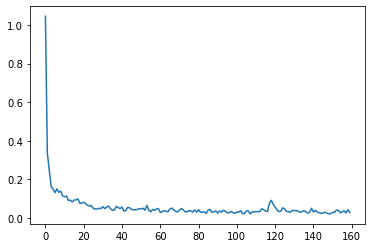

In [8]:
lr = 0.01

y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mae_tab= baselineModels.tabnetreg(X_train,y_train,X_test,y_test,batch_size,n_features,n_target,n_epochs, lr)
sb.glue("TabNet MAE",mae_tab)
print("TabNet MAE",mae_tab)